In [392]:
import sympy as sym
from sympy.functions import exp
from sympy.abc import x

In [393]:
x

x

Resolver el problema de regresión:

$$\underset{\alpha, \mu}{\operatorname{min}} J(\alpha, \mu) = \frac{1}{2n}\sum_{i=1}^n (\alpha \Phi(x_i) - y_i)^2$$

Para el caso donde m=1 y $\Phi = \phi$.

Derivadas parciales de cada $\phi_j$:

$$\frac{\partial}{\partial \mu} \phi_j = - \phi \frac{(x - \mu_j)}{\sigma ^ 2}$$

$$\frac{\partial}{\partial \mu} J(\alpha, \mu)  =  2/n * J'(\alpha, \mu) \frac{\partial}{\partial \mu} \phi_j$$


El Jacobiano de $\Phi = \phi_j$:

- Con $\a$ constante:
$$\nabla_x\Phi = \frac{\partial}{\partial \mu} \phi_j$$

Gradiente:

$$\alpha_j = \alpha_j - k$$

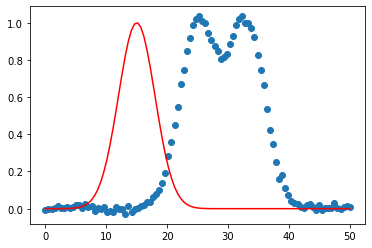

In [761]:
def build_approximately_normal_distribution(x, a: float = 1, mu: float = 0, sigma: float = 1, noise = 0.01):
    y: np.ndarray = normal_distribution(x, mean=mu, standard_deviation=sigma)
    noise = noise * np.random.normal(size=y.shape[0])
    y += noise
    return y



    

mu1 = 33
mu2 = 25
sig_cons = 3
x = np.linspace(0, 50, 100)
y1 = build_approximately_normal_distribution(
    x, mu=mu1, sigma=sig_cons)
y2 = build_approximately_normal_distribution(
    x, mu=mu2, sigma=sig_cons)
y3 = build_approximately_normal_distribution(
    x, mu=mu2, sigma=sig_cons)

y = y1 + y2 

mu_int1 = 15
mu_int2 = 25
y_init = build_approximately_normal_distribution(
    x, mu=mu_int1, sigma=sig_cons, noise=0)

plt.scatter(x, y)
plt.plot(x, y_init, c='red' )

La final>
$$\underset{\alpha, \mu}{\operatorname{min}} J(\alpha, \mu) =  \frac{1}{2n}\sum_{i=1}^n \left( \sum_{j=1}^m\alpha_j\phi_j(x_i) - y_i \right)^2$$

In [1036]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math

In [1037]:
def phi_j(x, mu_j, sig):
    # sig = sig_cons # Sigma constante
    phi = np.exp( - (x - mu_j)**2 / (2 * sig**2))
    return phi

def partial_phi_mu(x, mu_j, sig):
    #sig = sig_cons # Sigma constante
    phi = phi_j(x, mu_j, sig)
    part_phi_mu = - ((x - mu_j) / sig**2)  * phi
    return part_phi_mu
    

def PHI(x, mus, sig):
#     PHI = np.zeros_like(x)
    PHI = []
    for mu_j in mus:
        PHI.append(phi_j(x, mu_j, sig))
    return np.array(PHI)

def J(x, y, mu):
    y_hat = PHI(x, mu)
    residual = y - y_hat.sum()
    cost = (residual).dot(residual) 
    return cost

def grad_gauss(x, y, thetas, alphas, sig):
    nablaJ = []
#     alpha = np.ones_like(theta)
    y_hat = alphas.dot( PHI(x, thetas, sig) )
    dJ_df = y - y_hat # aqui estaria alphas
    
    for mu_j in thetas:
        dp_dmu_j = partial_phi_mu(x, mu_j, sig)
        dJ_dmu_j = dJ_df.dot(dp_dmu_j)        
        nablaJ.append(dJ_dmu_j)
        
    return np.array(nablaJ)


def GD(grad, thetas, alphas, sig,
       x, y, lr,
       n_iter = 250):
    
    thetas = np.array(thetas)
    alphas = np.array(alphas)

    for t in range(n_iter):
        # Alphas
        PHI_ = PHI(x, thetas, sig).T
        alphas = np.linalg.inv(PHI_.T.dot(PHI_)).dot(PHI_.T).dot(y)
        
        # Gradiente para mus
        nablaJ = grad(x, y, thetas, alphas, sig)
        thetas = thetas - lr*nablaJ
        
    return thetas, alphas

In [1047]:
def plot_gaussians(x, alphas, mus, sigma):
    model = np.zeros_like(x)
    for j in range(len(alphas)):
        phi =  alphas[j] * phi_j(x, mus[j], sigma)
        
#         model += phi
        plt.plot(x, phi)
#     plt.plot(x, model)

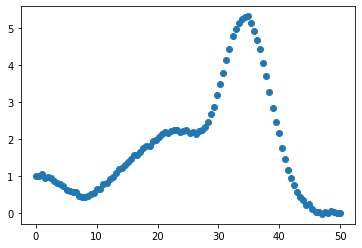

In [1039]:
def build_app_norm(x, a, mu, sig, noise=0.01):
    y = np.zeros_like(x)
    for j in range(len(mu)):
        y = y + a[j] * phi_j(x, mu[j], sig)
    y += noise * np.random.normal(size=y.shape[0])
    return y

sigma = 4
x = np.linspace(0, 50, 100)
y = build_app_norm(x, [1, 1.1, 2, 3, 2.3], [1, 15, 23, 34, 35], sig=sigma, noise=0.03)
plt.scatter(x, y)

#### Hay que poner una base para inicializar mu0

In [1040]:
mus = [1, 2, 3, 4, 5]
alphas = [1, 1, 1, 1, 1]

mu_hat, a_hat = GD(grad = grad_gauss, 
            thetas = mus, sig = sigma,
            alphas = alphas,
            x=x, y=y, 
            lr=0.1, n_iter=10000)

mu_hat, a_hat

(array([ 1.44594016,  1.56673344, 15.12879622, 23.14165121, 34.47005745]),
 array([ 4.09597917, -3.0981959 ,  1.1279316 ,  2.01140905,  5.26890408]))

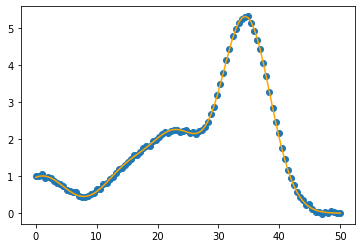

In [1041]:

# predict_a = PHI(x, mu_hat)
predict_a = np.array(a_hat).dot(PHI(x, mu_hat, sigma))

plt.scatter(x, y)
plt.plot(x, predict_a, c='orange')

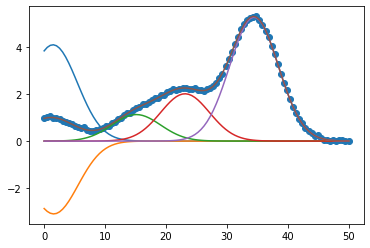

In [1042]:
plt.scatter(x, y)
plot_gaussians(x, a_hat, mu_hat, sigma)

## Time Series Data

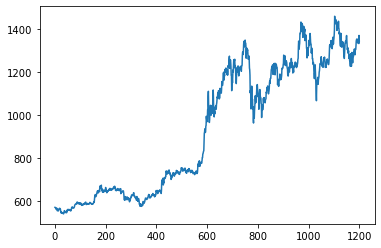

In [1043]:
import pandas as pd
df_eth = pd.read_pickle('../ETH_1200_hours_till_28012021.pkl')

y = df_eth['open']
x = np.arange(len(y))

plt.plot(x, y, label="sample data")


In [1077]:
m = 20
sigma = len(x) / ( m ) 
mus = np.linspace(1, len(x), m)

alphas = np.ones(m)
mu_hat, a_hat = GD(grad = grad_gauss, 
            thetas = mus,
            alphas = alphas,
            sig=sigma,
            x=x, y=y, 
            lr=0.01, n_iter=1000)

mu_hat, a_hat

(array([  -9.54077297,   71.36577938,  121.31208306,  195.24143575,
         249.89314663,  319.78157138,  377.11306043,  446.55032503,
         501.26501343,  576.94983663,  622.14089376,  709.67833913,
         741.2049606 ,  842.84666379,  861.66298687,  973.08069999,
         985.87781229, 1100.41558184, 1111.85825239, 1243.60359882]),
 array([ 426.88340377,  155.71395641,  283.70991517,  265.62907156,
         304.43448448,  212.92461676,  271.98543615,  226.01023659,
         490.79736766, -129.61193303,  907.27961557,   37.76516432,
        1019.65989201, -516.65804415, 1392.59508886,  -91.86775654,
        1174.97521056, -563.3211438 , 1680.28349857, 1126.79988317]))

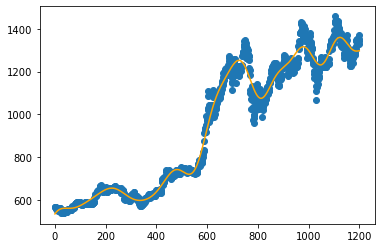

In [1078]:
predict_a = np.array(a_hat).dot(PHI(x, mu_hat, sigma))

plt.scatter(x, y)
plt.plot(x, predict_a, c='orange')

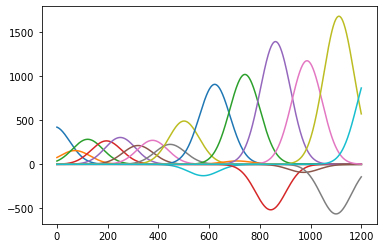

In [1079]:
for a, mu in zip(a_hat, mu_hat):
        phi =  a * phi_j(x, mu, sigma) 
        plt.plot(x, phi)

In [1065]:
m = 20
sigma = len(x) / ( m * 2) 
sigma

30.025

In [1075]:
m = 20
sigma = len(x) / ( m ) 
mus = np.linspace(1, len(x), m)

In [1076]:
mus

array([1.00000000e+00, 6.41578947e+01, 1.27315789e+02, 1.90473684e+02,
       2.53631579e+02, 3.16789474e+02, 3.79947368e+02, 4.43105263e+02,
       5.06263158e+02, 5.69421053e+02, 6.32578947e+02, 6.95736842e+02,
       7.58894737e+02, 8.22052632e+02, 8.85210526e+02, 9.48368421e+02,
       1.01152632e+03, 1.07468421e+03, 1.13784211e+03, 1.20100000e+03])